In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import copy

# Define dataset to plot here

In [2]:
datasetfile_path = "/home/mayank/Videos/single-ring-road-with-light/SingleLaneIDM/LocalView10Comm10_regs_4/Results/dataset.pkl"

# Load dataset in memory

In [3]:
with open(datasetfile_path, "rb") as handle:
    data_dict = pickle.load(handle)

# Dataset Attributes

In [4]:
num_episodes = data_dict["num_episodes"]
episode_length = data_dict["episode-length"]
time_period = data_dict["time-period"]
print(num_episodes)

20


In [5]:
data_dict["data"][0.2][0]["agent_vel"][0]

0.073

# Agent Speed as the function of time

In [7]:
global_vel_data = {}

for density in data_dict["data"].keys():
    
    vel_data = []
    
    for episode_num in data_dict["data"][density].keys():
            
            episode_data = []
            
            for step in range(0, len(data_dict["data"][density][episode_num]["agent_vel"])):
                episode_data.append(data_dict["data"][density][episode_num]["agent_vel"][step])
            
            vel_data.append(episode_data)
    
    global_vel_data[density] = copy.deepcopy(vel_data)


agent is moving at speed much greater than allowed by local view. However, due to pertubation is adapts its velocity.

# Average Speed as the function of densities

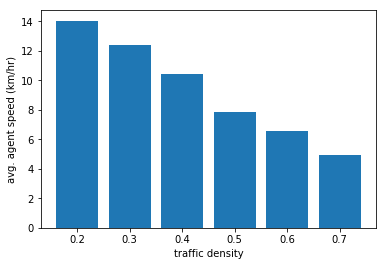

In [8]:
avg_speeds = []
densities = []

for density in global_vel_data.keys():
    densities.append(density)
    
    speed_sum = 0.0
    elements_count = 0
    for episode in global_vel_data[density]:
        for vel in episode:
            speed_sum += vel
            elements_count += 1
    
    avg_speeds.append((speed_sum/elements_count) * 3.6)

plt.bar(np.arange(len(densities)), avg_speeds)
plt.xticks(np.arange(len(densities)), densities)

plt.xlabel("traffic density")
plt.ylabel("avg. agent speed (km/hr)")
plt.show()

In [9]:
print(avg_speeds)

[14.042117122047257, 12.38598751329333, 10.428649264340455, 7.8566281548150565, 6.534450543154909, 4.907721593608583]


# Average Reward

In [10]:
avg_rewards = []
densities = []

for density in data_dict["data"].keys():
    densities.append(density)
    
    cum_reward_sum = 0.0
    elements_count = 0
    
    for episode in data_dict["data"][density]:
        cum_reward_sum += data_dict["data"][density][episode]["cum_reward"]
    avg_rewards.append(cum_reward_sum/num_episodes)

Text(0, 0.5, 'avg. reward')

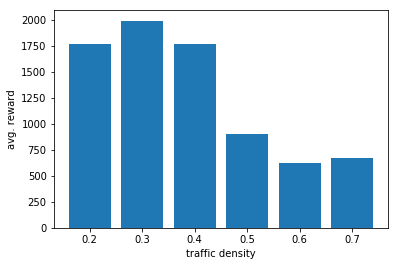

In [11]:
plt.bar(np.arange(len(densities)), avg_rewards)
plt.xticks(np.arange(len(densities)), densities)
plt.xlabel("traffic density")
plt.ylabel("avg. reward")

# Action Distribution

In [41]:
possible_actions = {}
for element in set(data_dict["data"][0.2][0]["planner_actions"]):
    possible_actions[element] = 0

action_distribution = {}
for density in data_dict["data"].keys():
    action_distribution[density] = copy.deepcopy(possible_actions)
    
    for episode_num in data_dict["data"][density]:
        for step in range(0, episode_length):
            action_distribution[density][data_dict["data"][density][episode_num]["planner_actions"][step]] += 1

IndexError: list index out of range

In [16]:
action_distribution

{0.2: {'dec': 52249, 'do-nothing': 68236, 'acc': 99515},
 0.3: {'dec': 56184, 'do-nothing': 65421, 'acc': 98395},
 0.4: {'dec': 61255, 'do-nothing': 64968, 'acc': 93777},
 0.5: {'dec': 68559, 'do-nothing': 55578, 'acc': 95863},
 0.6: {'dec': 76989, 'do-nothing': 55552, 'acc': 87459},
 0.7: {'dec': 83932, 'do-nothing': 53719, 'acc': 82349}}

In [13]:
for density in action_distribution.keys():
    
    total = 0
    for act in action_distribution[density].keys():
        total += action_distribution[density][act]
    
    assert total == (num_episodes * episode_length)

for density in action_distribution.keys():
    for action in action_distribution[density].keys():
        action_distribution[density][action] /= (num_episodes * episode_length)

In [14]:
plots = []
order = []

for action in action_distribution[0.2].keys():
    act_list = []
    order.append(action)
    for density in action_distribution.keys():
        act_list.append(action_distribution[density][action])
    
    plots.append(act_list)
    

In [15]:
order

['do-nothing', 'acc', 'dec']

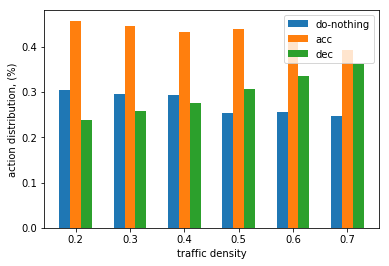

In [16]:
width = - 0.2

plt.bar(np.arange(len(densities)) - 0.2, plots[0], width=width, label=order[0])
plt.bar(np.arange(len(densities)), plots[1], width=width, label=order[1])
plt.bar(np.arange(len(densities)) + 0.2, plots[2], width=width, label=order[2])
plt.xticks(np.arange(len(densities)), densities)
plt.xlabel("traffic density")
plt.ylabel("action distribution, (%)")
plt.legend()
plt.show()

# Comm Actions Distribution

In [17]:
possible_regs = {}
for element in set(data_dict["data"][0.2][0]["comm_actions"]):
    possible_regs[element] = 0

regs_distribution = {}
for density in data_dict["data"].keys():
    regs_distribution[density] = copy.deepcopy(possible_regs)
    
    for episode_num in data_dict["data"][density]:
        for step in range(0, episode_length):
            regs_distribution[density][data_dict["data"][density][episode_num]["comm_actions"][step]] += 1

In [18]:
regs_distribution

{0.2: {'reg_3': 32686,
  'reg_1': 18523,
  'reg_0': 22103,
  'NULL': 23408,
  'reg_2': 23280},
 0.3: {'reg_3': 31831,
  'reg_1': 18635,
  'reg_0': 21752,
  'NULL': 24630,
  'reg_2': 23152},
 0.4: {'reg_3': 30913,
  'reg_1': 18774,
  'reg_0': 21175,
  'NULL': 25353,
  'reg_2': 23785},
 0.5: {'reg_3': 32673,
  'reg_1': 16710,
  'reg_0': 20011,
  'NULL': 25802,
  'reg_2': 24804},
 0.6: {'reg_3': 31810,
  'reg_1': 16646,
  'reg_0': 20599,
  'NULL': 27439,
  'reg_2': 23506},
 0.7: {'reg_3': 30144,
  'reg_1': 17423,
  'reg_0': 19734,
  'NULL': 30245,
  'reg_2': 22454}}

In [19]:
for density in regs_distribution.keys():
    
    total = 0
    for act in regs_distribution[density].keys():
        total += regs_distribution[density][act]
    
    assert total == (num_episodes * episode_length)

for density in regs_distribution.keys():
    for action in regs_distribution[density].keys():
        regs_distribution[density][action] /= (num_episodes * episode_length)

In [20]:
plots = []
order = []

for action in regs_distribution[0.2].keys():
    act_list = []
    order.append(action)
    for density in regs_distribution.keys():
        act_list.append(regs_distribution[density][action])
    
    plots.append(act_list)

In [21]:
order

['reg_3', 'reg_1', 'reg_0', 'NULL', 'reg_2']

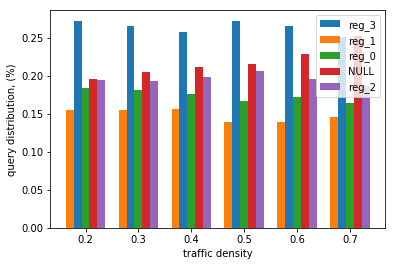

In [22]:
width = 0.15

plt.bar(np.arange(len(densities)) - 0.15, plots[0], width=width, label=order[0])
plt.bar(np.arange(len(densities)) - 0.3, plots[1], width=width, label=order[1])
plt.bar(np.arange(len(densities)), plots[2], width=width, label=order[2])
plt.bar(np.arange(len(densities)) + 0.15, plots[3], width=width, label=order[3])
plt.bar(np.arange(len(densities)) + 0.3, plots[4], width=width, label=order[4])
plt.xticks(np.arange(len(densities)), densities)
plt.xlabel("traffic density")
plt.ylabel("query distribution, (%)")
plt.legend()
plt.show()

# Perception of vehicle

<img align="left" src="ITSC2019.png">